In [67]:
import numpy as np
from matplotlib import pyplot as plt

In [68]:
f = open("soma_cube.txt", "r")
text = f.read()

In [69]:
split_sols = text.split('solution')
solutions = [split_sols[j] for j in range(1,241)]

In [71]:
action_list = []
pic_list = []
for s in solutions:

    actions = s.split('\n')[1:8]
    action_list.append(actions)
    
    pic = s.split('\n')[9:12]
    pic_list.append(pic)

In [5]:
unique_actions = np.unique(np.concatenate(action_list))

In [6]:
seq_list = []
for a_seq in action_list:
    seq = []
    for a in a_seq:
        seq.append(unique_actions.tolist().index(a))
    seq_list.append(seq)
    
actions = np.array(seq_list)

In [7]:
blocks = ['a','T','p','V','L','Z','b']

ims = []
for pic in pic_list:
    im = np.zeros((3,3,3))
    for row in range(3):
        bl = ''.join(pic[row].split(' '))
        im[row,:,:] = np.array([blocks.index(b) for b in bl]).reshape(3,3)
    ims.append(im)

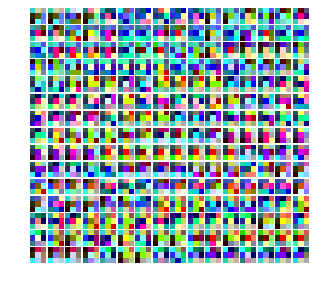

In [16]:
plt.figure(figsize=(5,5))
for j,im in enumerate(ims):
    plt.subplot(16,16,j+1)
    plt.imshow(im/6)
    plt.axis('off')
plt.subplots_adjust(hspace=0.1,wspace=0.05)
plt.show()

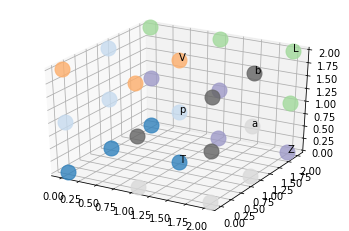

In [90]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
idx = 10
viridis = cm.get_cmap('tab20c', len(action_list[idx]))

ax = fig.add_subplot(111, projection='3d')
for idx in range(1):#len(action_list)):
    for i,a in enumerate(action_list[idx]):
        pose = np.array(' '.join(a[0:-1].split(',')).split()).reshape(-1,3).astype(int)
        plt.plot(pose[:,0],pose[:,1],pose[:,2],'o',color=viridis.colors[i],markersize=15,alpha=0.8)
        ax.text(pose[-1,0],pose[-1,1],pose[-1,2],a[-1])
plt.show()

In [88]:
action_list[0]

['0,0,0 0,1,0 0,2,0 1,1,0 T',
 '0,0,1 0,1,1 0,1,2 1,1,1 p',
 '0,0,2 1,0,2 1,1,2 V',
 '0,2,2 1,2,2 2,2,1 2,2,2 L',
 '0,2,1 1,2,0 1,2,1 2,2,0 Z',
 '1,0,1 2,0,1 2,0,2 2,1,2 b',
 '1,0,0 2,0,0 2,1,0 2,1,1 a']

In [9]:
np.save('actions.npy',actions)
np.save('ims.npy',ims)